# [BETA] Posterior Approximation for a Strauss interaction model for graph (for test)

#### Proposition #0:

$$P(y | n \theta) = exp[\beta_{01} t_{edge\_l0}(y) + \beta_{02} t_{edge\_l1}(y) + \beta_{12} t_{edge\_l2}(y)] $$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf

from math import exp

In [3]:
def print_config(data):
        if not isinstance(data, list):
            for k, v in data.items():
                if k != 'posteriors':
                    print("{} => {}".format(k, v))
                    
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    if not isinstance(data, list):
        print_config(data)
        data = data['posteriors']
    beta_01 = [d[0] for d in data]
    beta_02 = [d[1] for d in data]
    beta_12 = [d[2] for d in data]

    
    data_frame = pd.DataFrame({'beta_01': beta_01,
                               'beta_02': beta_02,
                               'beta_12': beta_12})
    
    return data_frame


def summary(data):
    col_names = data.columns.values
    for i in [25,50,75]:
        print("========== Q{} ==========".format(i))
        for _, param_name in np.ndenumerate(col_names):
            q = np.percentile(data[param_name], i)
            print("Q{} for {} parameter {}".format(i, param_name, q))
    
    
def plot_marginals(data_abc, burn_in=0, by=1):
    
    col_names = data_abc.columns.values
    
    fig, axs = plt.subplots(len(col_names), 2, figsize=(14,25))
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        # Sample parameter
        params = data_abc[param_name].tolist()[burn_in::by]

        # Distribution
        sns.distplot(params, axlabel="{} distribution ABC".format(param_name), ax=axs[i, 0])

        # Path
        axs[i, 1].plot(range(len(params)), params)
        axs[i, 1].set(xlabel='iterations', ylabel='{} parameter ABC'.format(param_name))

def plot_dist(data, burn_in=0, by=1):
    beta_01 = data['beta_01'].tolist()[burn_in::by]
    beta_02 = data['beta_02'].tolist()[burn_in::by]
    beta_12 = data['beta_12'].tolist()[burn_in::by]

    
    data_sampled = pd.DataFrame({'beta_01': beta_01,
                                 'beta_02': beta_02,
                                 'beta_12': beta_12})
    
    g = sns.PairGrid(data_sampled, height=5)
    g = g.map_upper(plt.scatter)
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)


def autocor(data_abc, burn_in=0, by=1):

    col_names = data_abc.columns.values
    fig, axs = plt.subplots(len(col_names), 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        params = data_abc[param_name].tolist()[burn_in::by]
    
        plot_acf(params, ax=axs[i])
        axs[i].set_title("Autocorrelation for {} parameter".format(param_name))

### Experimentation #1

In [3]:
FILE_NAME_1 = 'assets/exp-beta1.json'
data1 = extract_from_file(FILE_NAME_1)

algo => abc_shadow
model => strauss_inter_graph
theta0 => [0.5, -0.1, 0.5]
theta_perf => [0.5, -0.1, 0.5]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01]
y_obs => [97.31631631631632, 41.18018018018018, 98.13513513513513]


In [4]:
summary(data1)

========== Q25 ==========
Q25 for beta_01 parameter 0.43669291248766484
Q25 for beta_02 parameter -0.12245077742922808
Q25 for beta_12 parameter 0.43208214804649986
========== Q50 ==========
Q50 for beta_01 parameter 0.5636275704191771
Q50 for beta_02 parameter -0.052047482391736
Q50 for beta_12 parameter 0.5693457482613158
========== Q75 ==========
Q75 for beta_01 parameter 0.6992857674241814
Q75 for beta_02 parameter 0.02429080489156213
Q75 for beta_12 parameter 0.7009004265280843


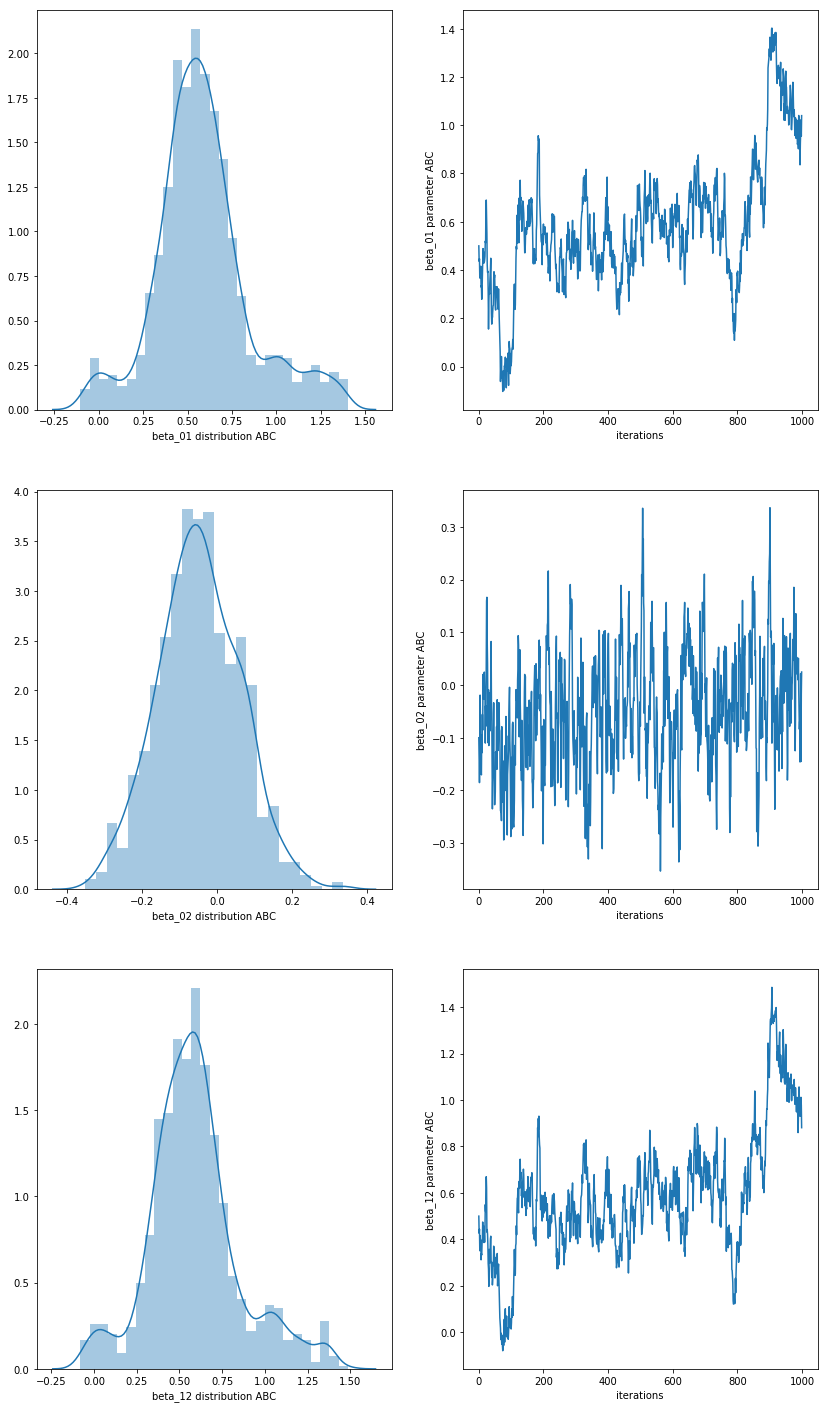

In [6]:
plot_marginals(data1, by=20)
# plt.savefig('post_interactions_marginals.pdf')

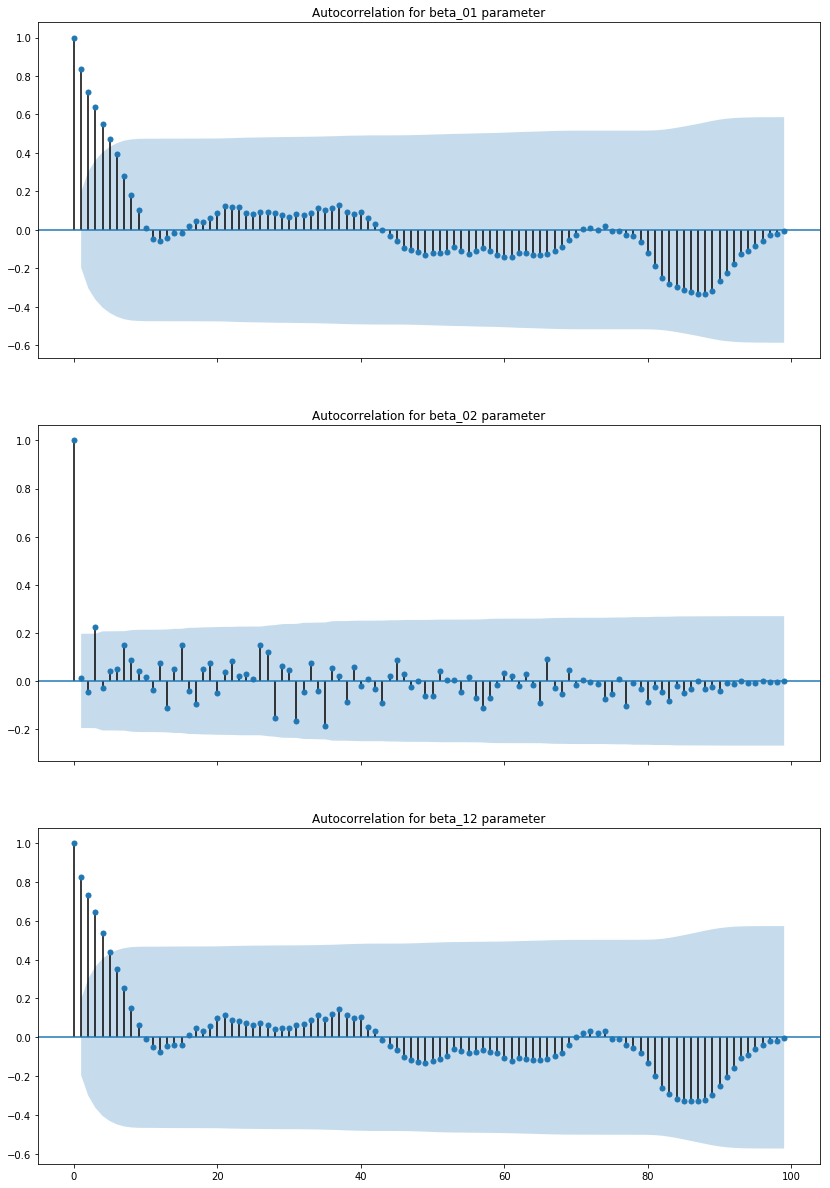

In [10]:
autocor(data1, by=200)

In [8]:
data1

,beta_01,beta_02,beta_12
0,0.500000,-0.100000,0.500000
1,0.467383,-0.120389,0.489686
2,0.427797,-0.130449,0.498838
3,0.407617,-0.146463,0.459983
4,0.410118,-0.158522,0.451101
5,0.395502,-0.146442,0.439765
6,0.392636,-0.169473,0.427762
7,0.400502,-0.198742,0.437420
8,0.405503,-0.201225,0.454655
9,0.430395,-0.163429,0.457121


### Experimentation #2

In [4]:
FILE_NAME_2 = 'assets/exp-beta2.json'
data2 = extract_from_file(FILE_NAME_2)

algo => abc_shadow
model => strauss_inter_graph
theta0 => [0.5, -0.1, 0.5]
theta_perf => [0.5, -0.1, 0.5]
iters => 200000
n => 100
delta => [0.01, 0.01, 0.01]
y_obs => [97.31631631631632, 41.18018018018018, 98.13513513513513]


In [5]:
summary(data2)

========== Q25 ==========
Q25 for beta_01 parameter 0.41142490206719085
Q25 for beta_02 parameter -0.13296035103716033
Q25 for beta_12 parameter 0.410467716537843
========== Q50 ==========
Q50 for beta_01 parameter 0.6369202377444214
Q50 for beta_02 parameter -0.04699642095301958
Q50 for beta_12 parameter 0.6380479861825409
========== Q75 ==========
Q75 for beta_01 parameter 0.9064165985801225
Q75 for beta_02 parameter 0.045322436450088835
Q75 for beta_12 parameter 0.9076071741088767


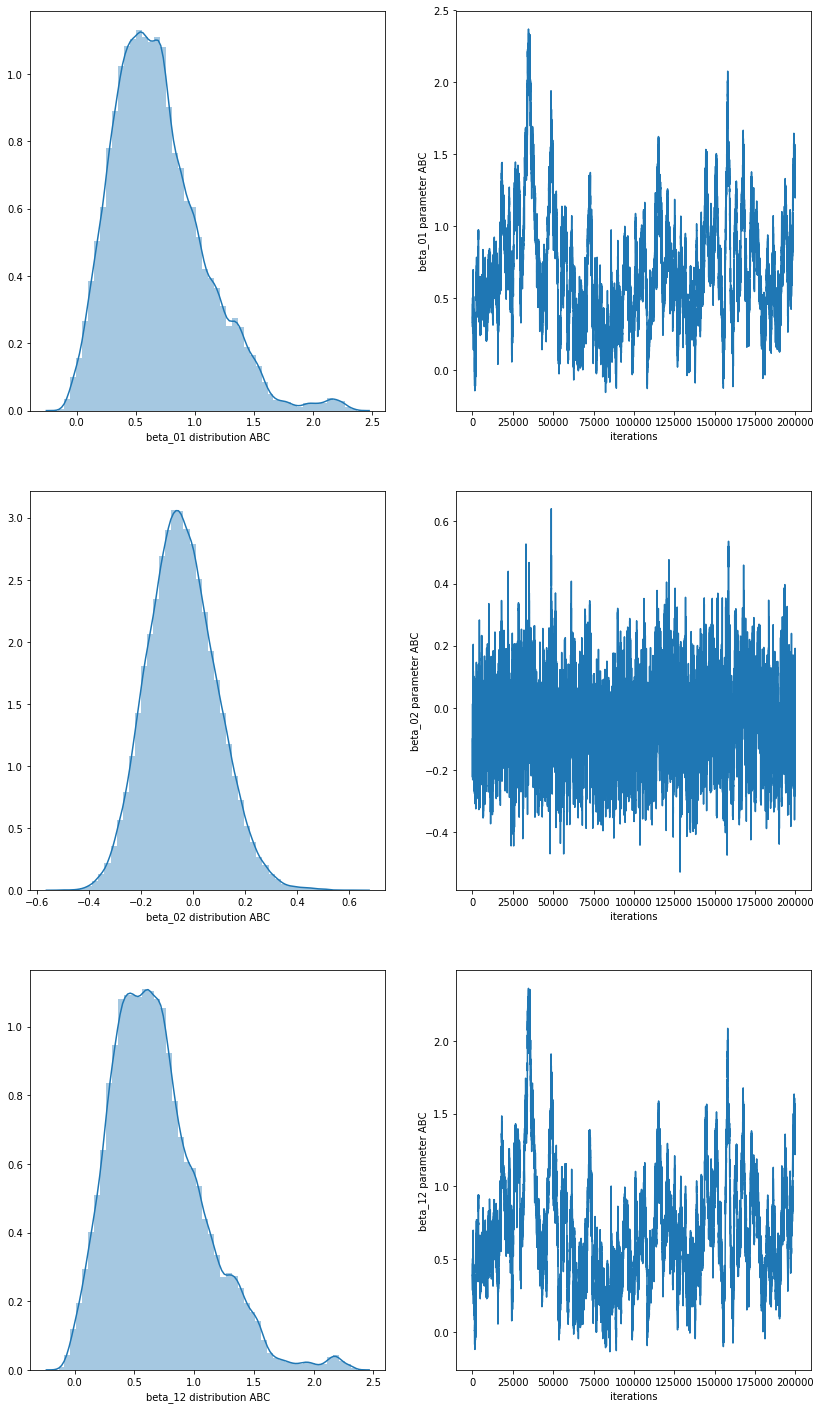

In [7]:
plot_marginals(data2)

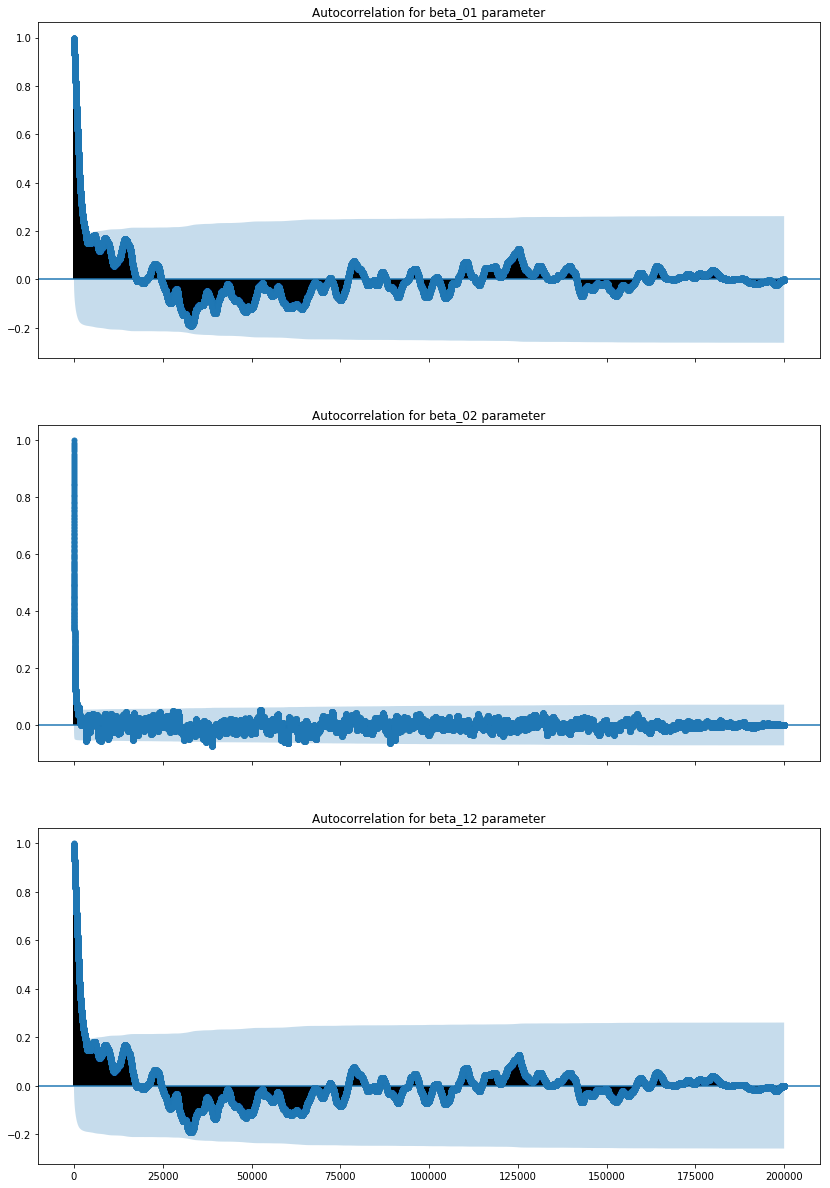

In [10]:
autocor(data2)

### Experimentation #3

In [27]:
FILE_NAME_3 = 'assets/exp-beta3.json'
data3 = extract_from_file(FILE_NAME_3)

algo => abc_shadow
model => strauss_graph
theta0 => [0.0, 0.0, 0.0, 1.0]
theta_perf => [0.0, 0.0, 0.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


In [28]:
summary(data3)

========== Q25 ==========
Q25 for theta_l0 parameter 0.0
Q25 for theta_l1 parameter 0.0
Q25 for theta_l2 parameter 0.0
Q25 for beta parameter 0.9150154012760804
========== Q50 ==========
Q50 for theta_l0 parameter 0.0
Q50 for theta_l1 parameter 0.0
Q50 for theta_l2 parameter 0.0
Q50 for beta parameter 1.1385469984033074
========== Q75 ==========
Q75 for theta_l0 parameter 0.0
Q75 for theta_l1 parameter 0.0
Q75 for theta_l2 parameter 0.0
Q75 for beta parameter 1.387562847587874


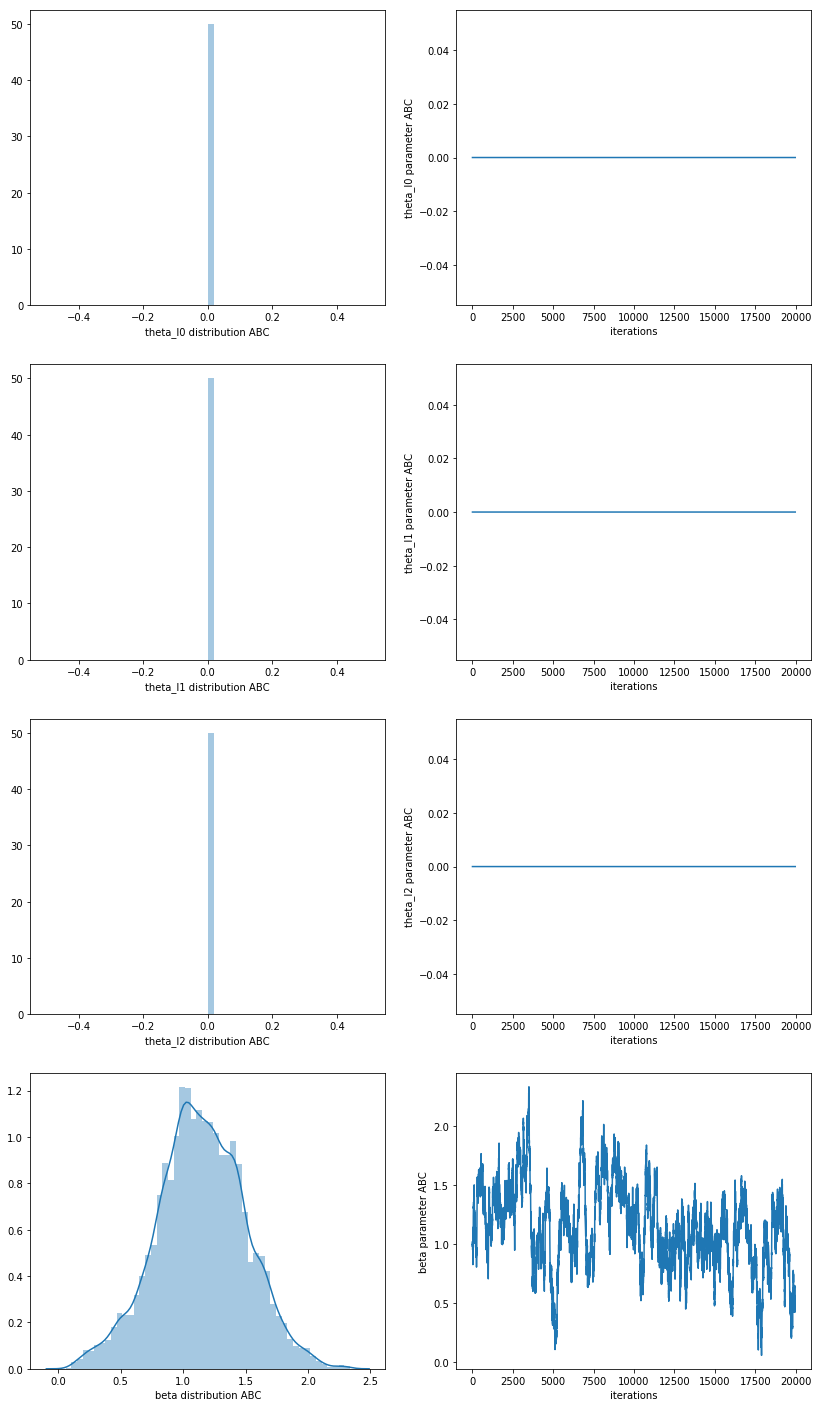

In [29]:
plot_marginals(data3, burn_in=20)

## Experiment #4

In [30]:
FILE_NAME_4 = 'assets/exp-beta4.json'
data4 = extract_from_file(FILE_NAME_4)

algo => abc_shadow
model => strauss_graph
theta0 => [1.0, 1.0, 1.0, 1.0]
theta_perf => [1.0, 1.0, 1.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


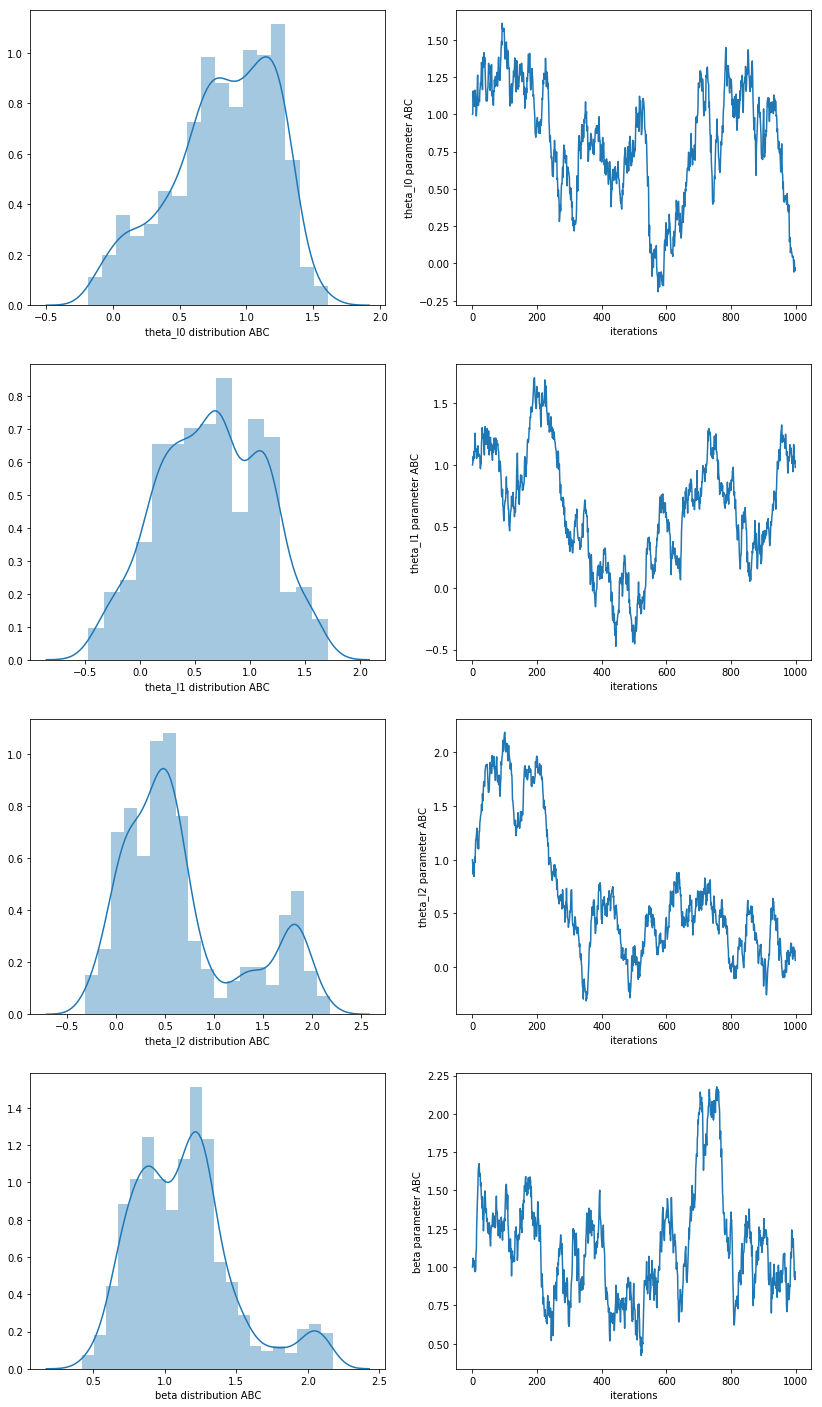

In [31]:
plot_marginals(data4, by=20)

### Experiment #5

In [32]:
FILE_NAME_5 = 'assets/exp-beta5.json'
data5 = extract_from_file(FILE_NAME_5)

algo => abc_shadow
model => strauss_graph
theta0 => [1.0, 1.0, 1.0, 1.0]
theta_perf => [1.0, 1.0, 1.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


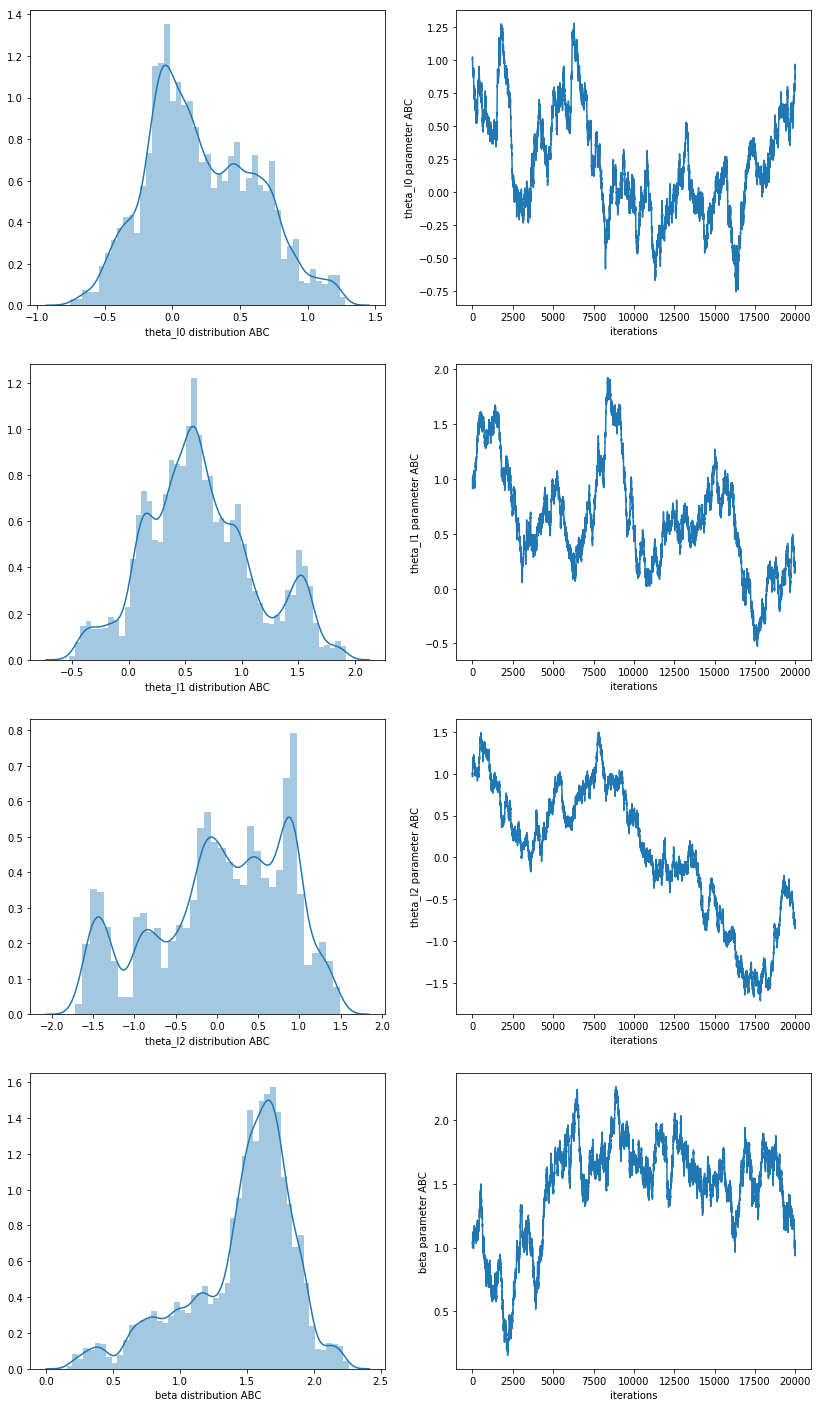

In [33]:
plot_marginals(data5)

### Experiment #5

In [34]:
FILE_NAME_6 = 'assets/exp-beta6.json'
data6 = extract_from_file(FILE_NAME_6)

algo => abc_shadow
model => strauss_graph
theta0 => [0.0, 0.0, 0.0, 1.0]
theta_perf => [0.0, 0.0, 0.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


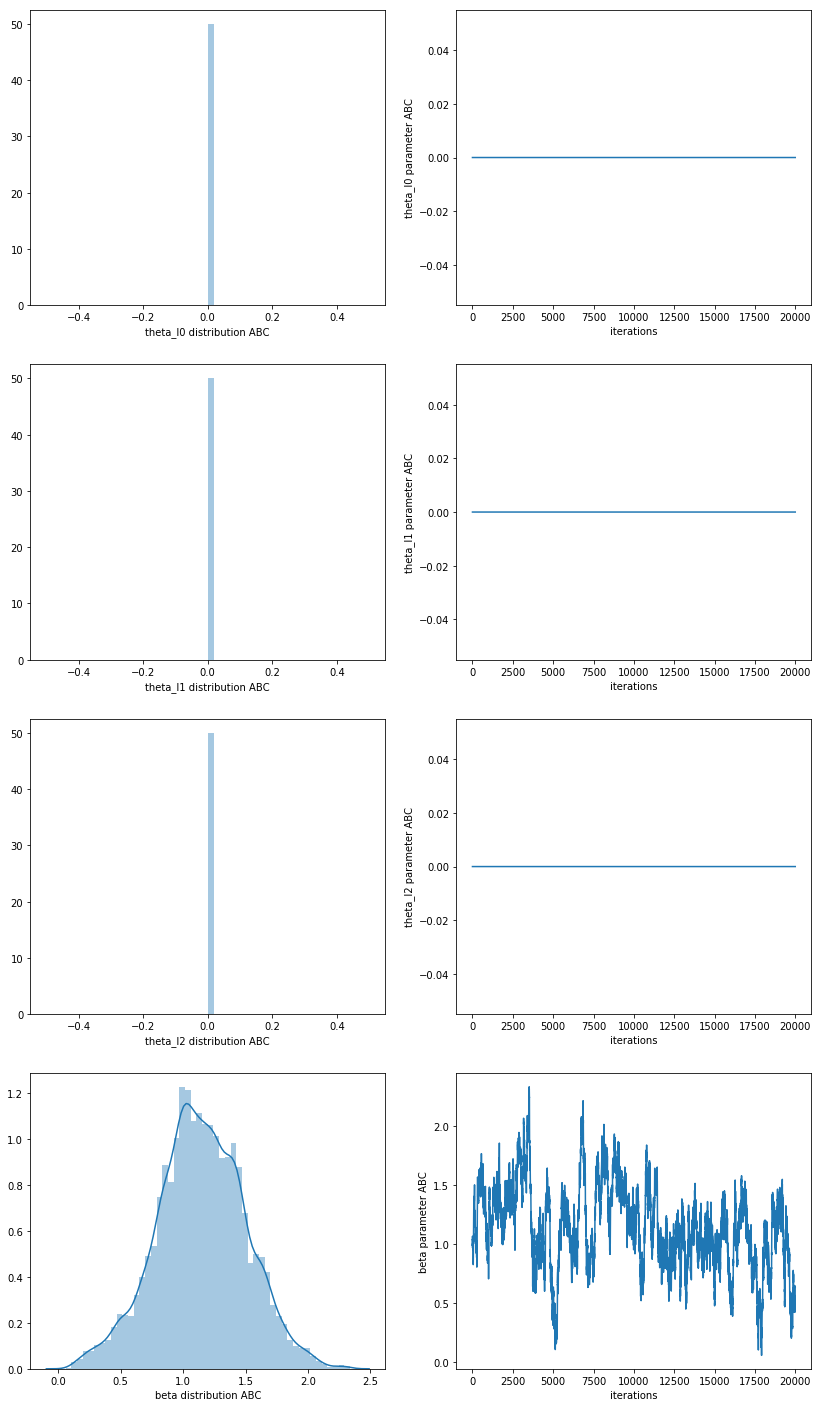

In [35]:
plot_marginals(data6)

# Prosition #1 :
$$P(y | n \theta) = exp[\theta_{l0} t_{edge\neq l0}(y) + \theta_{l1} t_{edge\_l1}(y) + \theta_{l2} t_{edge\_l2}(y) + \theta_{l12} t_{edge\_l1\neq l2}(y) ] $$

In [4]:
FILE_NAME_7 = 'assets/exp-beta7.json'
data7 = extract_from_file(FILE_NAME_7)

algo => abc_shadow
model => 2_interactions
theta0 => [-4.2, 1.0, 1.0, 0.6]
theta_perf => [-4.2, 1.0, 1.0, 0.6]
iters => 80000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [32.0437, 16.0155, 16.0282, 113.5091]


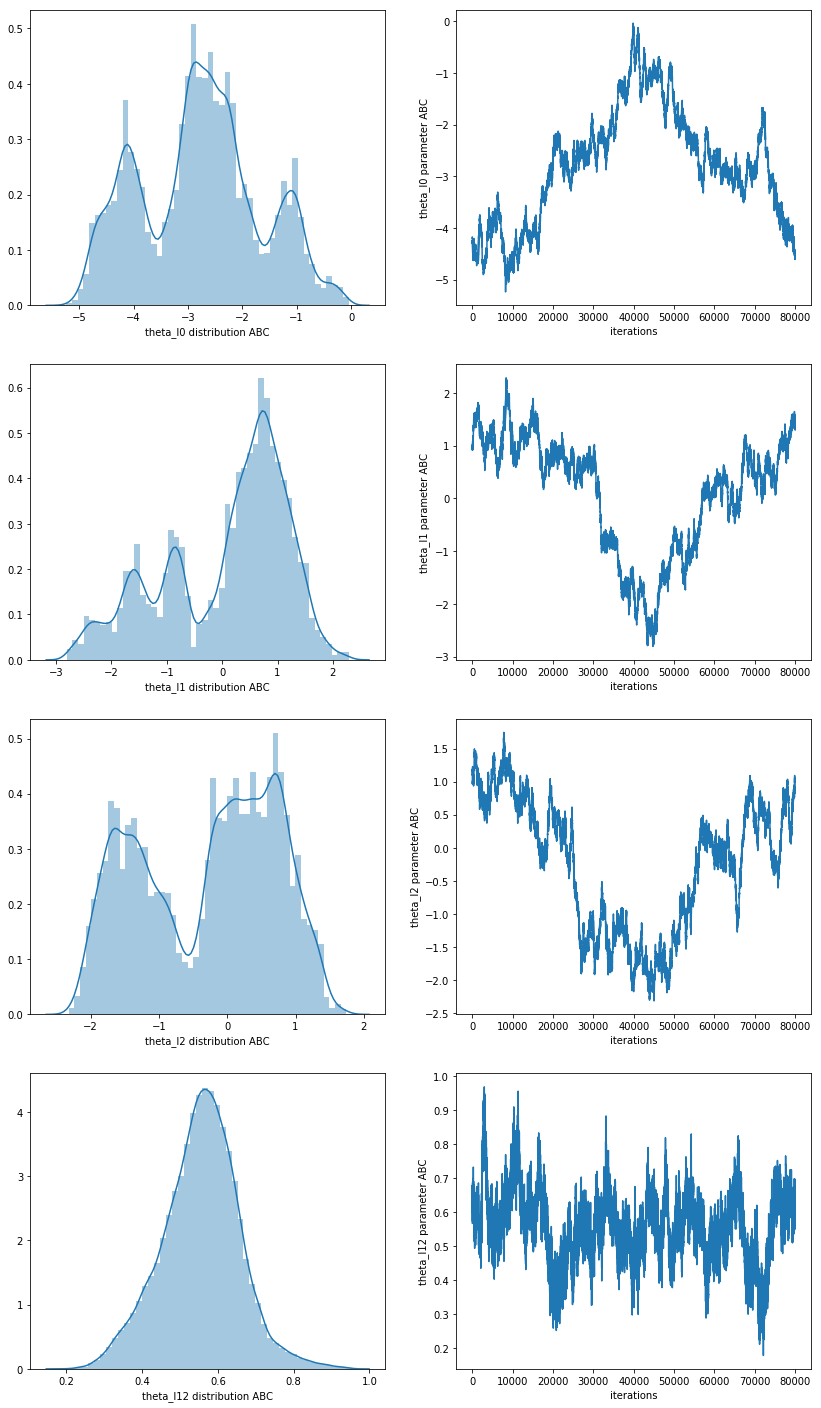

In [5]:
plot_marginals(data7)

In [9]:
FILE_NAME_8 = 'assets/exp-beta8.json'
data8 = extract_from_file(FILE_NAME_8)

FileNotFoundError: [Errno 2] No such file or directory: 'assets/exp-beta8.json'

In [8]:
plot_marginals(data8, by=100)

NameError: name 'data8' is not defined